# Rusty Bargain: optimizing car selling price prediction

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training


In order to decide on the best method to efficiently predict car pricing, we will:


#### a) Import a dataset containing the folllowing historical data, and get it ready for training ML models.


#### Features

- DateCrawled — date profile was downloaded from the database

- VehicleType — vehicle body type

- RegistrationYear — vehicle registration year

- Gearbox — gearbox type

- Power — power (hp)

- Model — vehicle model

- Mileage — mileage (measured in km due to dataset's regional specifics)

- RegistrationMonth — vehicle registration month

- FuelType — fuel type

- Brand — vehicle brand

- NotRepaired — vehicle repaired or not

- DateCreated — date of profile creation

- NumberOfPictures — number of vehicle pictures

- PostalCode — postal code of profile owner (user)

- LastSeen — date of the last activity of the user


#### Target

- Price — price (Euro)



#### b) Evaluate the performance of different machine learing models for making car price predictions:

We will assess how the following models perform in terms of quality and efficiency:

- Self-made Linear Regression model.

- Linear regression ready implementation for a sanity check.

- Decision tree regressor with hyperparameter tuning.

- Random forest regressor with hyperparameter tuning.

- LightGBM with hyperparameter tuning.

- CatBoost and XGBoost with hyperparameter tuning.


The metric we'll use for assessing the quality of the predicitions is the Root mean squared error (RMSE). As for the time required for training and the speed of the predictions, we'll print out the time (in seconds) it took each model to get trained and make those predictions.


## 1) Data preparation

In [1]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [4]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from catboost import Pool
from xgboost import XGBRegressor
from sklearn.preprocessing import MaxAbsScaler
import time
from scipy import stats

In [5]:
import lightgbm as lgb

In [6]:
# Load dataset into a Dataframe
try:
    df=pd.read_csv('c:/Users/josef/Practicum/Numerical methods/car_data.csv')
except:
    df = pd.read_csv('/datasets/car_data.csv')
    

In [7]:
#Print first five rows
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [8]:
#print df size
df.shape

(354369, 16)

In [9]:
#print numerical columns statistics
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [10]:
#check for duplicates
df.duplicated().sum()

262

In [11]:
#print % of missing values
df.isna().sum()/len(df)*100

DateCrawled           0.000000
Price                 0.000000
VehicleType          10.579368
RegistrationYear      0.000000
Gearbox               5.596709
Power                 0.000000
Model                 5.560588
Mileage               0.000000
RegistrationMonth     0.000000
FuelType              9.282697
Brand                 0.000000
NotRepaired          20.079070
DateCreated           0.000000
NumberOfPictures      0.000000
PostalCode            0.000000
LastSeen              0.000000
dtype: float64

In [12]:
#Analyze data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

### Data overview:

The dataset has 354369 rows x 16 columns

There are some issues that need to be fixed before moving forward with the analysis:

#### a) Column names: 

First thing to notice is that columns are to be renamed following the snake_case syntax, and changing uppercase characters by lowercase.

#### b) Duplicates:

There are 262 duplicated rows. We will drop them out as they represent an insignificant portion of the dataset.

#### c) Data types:

DateCrawled, DateCreated and LastSeen will be changed to integers made up with their timestamp value. This will make it easier to train ML models later on.


#### d) Odd numerical column values:

Even though categorical columns do not seem to have weird or unmatching types assigned, some numerical columns present unfeasible figures. Such is the case of:

- price: 0 € needs to be corrected (These are probably posted at that price to get them listed first).
- registration_year: 1000 and 9999 need to be corrected.
- power: the minimum value of 0 and the maximum value of 20,000 hp is to be replaced by a feasible number.
- registration_month: 0 is not a real month, so we must correct it.
- number_of_pictures: it's set at zero in every row, so we can get rid of that column.


#### e) Missing values: 

The percentage of missing values are as follows:

NotRepaired          20.08%

VehicleType          10.6%

FuelType              9.28%

Gearbox               5.6%


Model                 5.56%






We will inspect the distribution of each column values and try to deal with them in the most effective possible way.






### 1.a) Column names: change to snake_case syntax

In [13]:
#Create dictionary with values to be replaced and values by which they'll be replaced
replace_dict={}

for word in df.columns:
    
    new_word=""
    
    for i, character in enumerate(word):
        
        if character== character.upper():
            if i==0:
                new_character= character.lower()
            else:
                new_character='_'+character.lower()
        else:
            new_character= character
            
        new_word+=new_character
        
    replace_dict[word]= new_word

#print result
replace_dict

{'DateCrawled': 'date_crawled',
 'Price': 'price',
 'VehicleType': 'vehicle_type',
 'RegistrationYear': 'registration_year',
 'Gearbox': 'gearbox',
 'Power': 'power',
 'Model': 'model',
 'Mileage': 'mileage',
 'RegistrationMonth': 'registration_month',
 'FuelType': 'fuel_type',
 'Brand': 'brand',
 'NotRepaired': 'not_repaired',
 'DateCreated': 'date_created',
 'NumberOfPictures': 'number_of_pictures',
 'PostalCode': 'postal_code',
 'LastSeen': 'last_seen'}

In [14]:
#replace column names
df= df.rename(columns=replace_dict)
df.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


### 1.b) Remove duplicates


In [15]:
#remove duplicates and reset index
df.drop_duplicates( inplace=True, ignore_index=True)

In [16]:
#check result
df.duplicated().sum()

0

### 1.c) Change datatypes

In [17]:
#change dates to datetime

df['date_crawled']= pd.to_datetime(df['date_crawled'])
df['date_created']= pd.to_datetime(df['date_created'])
df['last_seen']= pd.to_datetime(df['last_seen'])

#change datetime features to integer to enable ML models to easily process them
df['date_crawled'] = df['date_crawled'].apply(lambda x: x.value)
df['date_created'] = df['date_created'].apply(lambda x: x.value)
df['last_seen'] = df['last_seen'].apply(lambda x: x.value)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354107 entries, 0 to 354106
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354107 non-null  int64 
 1   price               354107 non-null  int64 
 2   vehicle_type        316623 non-null  object
 3   registration_year   354107 non-null  int64 
 4   gearbox             334277 non-null  object
 5   power               354107 non-null  int64 
 6   model               334406 non-null  object
 7   mileage             354107 non-null  int64 
 8   registration_month  354107 non-null  int64 
 9   fuel_type           321218 non-null  object
 10  brand               354107 non-null  object
 11  not_repaired        282962 non-null  object
 12  date_created        354107 non-null  int64 
 13  number_of_pictures  354107 non-null  int64 
 14  postal_code         354107 non-null  int64 
 15  last_seen           354107 non-null  int64 
dtypes:

### 1.d) Replace odd numerical values

#### 1.d.1) price

In [18]:
#get % of cars where price is < 100 $
df.loc[df['price']<100,'price'].count()/len(df)

0.03759033286548981

As the prices below 100 $ are only affecting the 4% of the dataset, and filling out the target value is not a good practice because it might lead to biased conclusions, we'll drop out these rows.

In [19]:
#redefine df selecting only rows where price>0€
df= df[df['price']>99].copy()
df.reset_index(inplace=True, drop=True)
df.shape

(340796, 16)

#### 1.d.2) registration_year

In [20]:
#get % of cars where registration year was before 1970
(df.loc[df['registration_year']<1970,'registration_year'].count())/len(df)*100

0.3271752015868731

In [21]:
#get % of cars where registration year was after 2019
(df.loc[df['registration_year']>2019,'registration_year'].count())/len(df)*100

0.021127008532964002

In [22]:
#get % of cars where registration year is >2019 or <1970
(df.loc[df['registration_year']<1970,'registration_year'].count())/len(df)*100+(df.loc[df['registration_year']>2019,'registration_year'].count())/len(df)*100

0.3483022101198371

As both values added together represent an extremely low percentage of the dataset (0.3%), the best way to go is dropping out such rows.

In [23]:
#redefine df selecting only rows where registration year is neither 1000 nor 9999
df= df[(df['registration_year']<=2019) & (df['registration_year']>=1970)].copy()
df.reset_index(inplace=True, drop=True)
df.shape

(339609, 16)

#### 1.d.3) power

We will consider valid hp values all of those between 50 and 250.

The last car one could buy with 50 hp was released in 1993, according to this article: https://www.autoweek.com/car-life/but-wait-theres-more/a35086315/what-was-the-last-new-car-you-could-buy-with-under-50-horsepower/ 

In [24]:
#get % of cars where hp is 0
(df.loc[df['power']==0,'power'].count())/len(df)*100

10.192014934822105

In [25]:
#get % of cars where hp is >0 but <50
(df.loc[(df['power']>0) & (df['power']<50),'power'].count())/len(df)*100

1.57769670415095

In [26]:
#get % of cars where hp is higher than 250
(df.loc[df['power']>300,'power'].count())/len(df)*100

0.9787726473680026

We will set all the odd values to 0 (unknown) until we've filled out the missing values in "model". After that, we'll assess the feasibility of replacing 0 by the mean/median for the model.

In [27]:
#replace power of cars where hp is <50 or >250 by 0
df.loc[df['power']<50,'power'] = 0
df.loc[df['power']>250,'power'] = 0

In [28]:
#get % of cars where hp is 0
(df.loc[df['power']==0,'power'].count())/len(df)*100

13.866534750256912

#### 1.d.4) registration_month: 0 

In [29]:
#print % of rows where month=0
df.loc[df['registration_month']==0, 'registration_month'].count()/len(df)*100

9.23267640139101

In [30]:
#print percentage of cars registered each month
(df['registration_month'].value_counts()/len(df)*100).sort_index()

0     9.232676
1     6.578153
2     6.082878
3     9.884014
4     8.386704
5     8.333112
6     9.003001
7     7.761867
8     6.473032
9     6.840808
10    7.503629
11    6.963302
12    6.956824
Name: registration_month, dtype: float64

Even though only a 9% of values is wrong in registration_month, it's not worth dropping out the rows as the column is not actually likely to hit the price of the car. We will leave the month as 0, meaning that it is "unknown". Since registration_month is consistently distributed accross all the year, replacing 0 by any specific month could be misleading.

#### 1.d.5) number_of_pictures

In [31]:
#print value counts
df['number_of_pictures'].value_counts()

0    339609
Name: number_of_pictures, dtype: int64

In [32]:
#drop column
df.drop('number_of_pictures', axis=1, inplace=True)


In [33]:
#check statistics of numerical columns after dealing with odd values
df.describe()

,date_crawled,price,registration_year,power,mileage,registration_month,date_created,postal_code,last_seen
count,3.396090e+05,339609.000000,339609.000000,339609.000000,339609.000000,339609.000000,3.396090e+05,339609.000000,3.396090e+05
mean,1.461751e+18,4577.324756,2003.346042,101.189621,128700.711701,5.804254,1.461668e+18,50701.473450,1.462677e+18
std,6.941641e+15,4505.451671,6.874705,58.127163,37018.295074,3.689136,6.944732e+15,25728.001994,5.483422e+15
min,1.451866e+18,100.000000,1970.000000,0.000000,5000.000000,0.000000,1.412294e+18,1067.000000,1.451866e+18
25%,1.458248e+18,1200.000000,1999.000000,67.000000,125000.000000,3.000000,1.458173e+18,30455.000000,1.458726e+18
50%,1.458943e+18,2900.000000,2003.000000,102.000000,150000.000000,6.000000,1.458864e+18,49525.000000,1.462371e+18
75%,1.462298e+18,6500.000000,2008.000000,140.000000,150000.000000,9.000000,1.462234e+18,71229.000000,1.465064e+18
max,1.480810e+18,20000.000000,2019.000000,250.000000,150000.000000,12.000000,1.480723e+18,99998.000000,1.480809e+18


We see that now, price ranges from USD 100 to USD 20,000, registration_year starts is 1970 and ends in 2019, and even though power was limited to a maximum of 250 hp, such column and registration month still have a min of zero to indicate the real value is unknown.

### 1.e) Fix missing values


#### 1.e.1) vehicle type
The vehicle type can be easily pulled from the brand and model.

First off, we'll start by rows where model is not missing and use the brand and model to fill out values.

In [34]:
#Print sum of missing values
df['vehicle_type'].isna().sum()

32399

In [35]:
#create a df setting the first vehicle type for a given model and brand
v_type_df= df.groupby(['brand', 'model']).agg({'vehicle_type':'first'})

v_type_df.reset_index(inplace=True)
v_type_df

,brand,model,vehicle_type
0,alfa_romeo,145,small
1,alfa_romeo,147,sedan
2,alfa_romeo,156,wagon
3,alfa_romeo,159,sedan
4,alfa_romeo,other,coupe
...,...,...,...
292,volvo,v40,wagon
293,volvo,v50,wagon
294,volvo,v60,wagon
295,volvo,v70,wagon


In [36]:
#where model is not missing, fill out values looking up the type in the previous df

for i in range(len(df)):
    if pd.notnull(df.loc[i,'model']) and pd.isnull(df.loc[i,'vehicle_type']):
        df.loc[i,'vehicle_type']=  pd.Series(v_type_df.loc[(v_type_df['brand']==df.loc[i,'brand']) & (v_type_df['model']==df.loc[i,'model']),'vehicle_type'].values).mode()[0]
        
    else:
        continue

In [37]:
#print % of remaining missing values

df['vehicle_type'].isna().sum()/len(df)*100

1.5217500125143917

In [38]:
#Make sure model is also missing in all of them
len(df[(df['vehicle_type'].isna()) &(df['model'].isna())])/len(df)*100

1.5217500125143917

Provided that remaining missing values in vehicle type represent only 1.5% of the dataset, and they can't be reliably filled out due to model also being missing, we'll drop out those rows.

In [39]:
#remove rows where vehicle type could not be filled out based on model and brand
df= df[df['vehicle_type'].isna()==False]
df.reset_index(inplace=True, drop=True)
len(df)

334441

#### 1.e.2) Model, fuel type and gearbox

Recall from the data overview that the percentage of missing values are as follows:

- FuelType 9.28%

- Gearbox 5.6%

- Model 5.56%

Correlation between model and price is rather weak (-0.033), hence, the risk of biasing the results by inaccurately filling out missing values is lower. When it comes to fuel type and gearbox the risk is higher, because of their correlation index of -0.32 and -0.26. However, we can notice that the % of empty values is not that high. 

The most reasonable way to get the model, fuel type and Gearbox correctly is pulling it from other rows where the brand, vehicle type and registration year is the same.

Since NaN values are sorted last when applying ascending order, we will sort the df by brand, vehicle type and registration year (for a given year, each brand usually launches one model per vehicle type) , and finally by model (NaN values will be at the end) in order to use forward filling to fill out NaN cells (ffill takes the inmediately preceeding value).


Once model is complete, we'll do the same with fuel type and gearbox.

In [40]:
#check if missing values are sorted first or last
df_sorted=df.sort_values(by=['brand','vehicle_type','registration_year','model','fuel_type', 'gearbox'])
df_sorted[(df_sorted['brand']=='volvo') & (df_sorted['vehicle_type']=='wagon') & (df_sorted['registration_year']==1998)]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,postal_code,last_seen
277180,1459385880000000000,6000,wagon,1998,manual,165,other,150000,3,petrol,volvo,no,1459296000000000000,90455,1459729020000000000
194293,1467642960000000000,270,wagon,1998,manual,90,v40,150000,6,gasoline,volvo,no,1467590400000000000,44789,1467642960000000000
276764,1457125020000000000,590,wagon,1998,manual,90,v40,150000,5,gasoline,volvo,yes,1457049600000000000,44789,1457125020000000000
290487,1459773780000000000,450,wagon,1998,manual,90,v40,150000,6,gasoline,volvo,yes,1459728000000000000,44789,1465047840000000000
324094,1459360500000000000,1350,wagon,1998,manual,90,v40,150000,11,gasoline,volvo,no,1459296000000000000,76297,1467621900000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11440,1457992140000000000,500,wagon,1998,manual,110,NaN,150000,7,petrol,volvo,yes,1457913600000000000,27245,1465047960000000000
74426,1458517860000000000,1700,wagon,1998,manual,144,NaN,150000,5,petrol,volvo,no,1458432000000000000,61279,1459016280000000000
76784,1458682620000000000,1750,wagon,1998,manual,140,NaN,150000,0,petrol,volvo,NaN,1458604800000000000,49624,1465056960000000000
333797,1458661080000000000,400,wagon,1998,manual,105,NaN,150000,7,petrol,volvo,NaN,1458604800000000000,25336,1459428240000000000


In [41]:
#sort values by brand, vehicle type, registration year and model (NaN values will be last)
df=df.sort_values(by=['brand','vehicle_type','registration_year','model'])

#use forward fill method to replace missing values (the previous value will be used)
df['model']=df['model'].fillna(method='ffill')



In [42]:
#check an example where model has been filled out
df[(df['brand']=='volvo') & (df['vehicle_type']=='wagon') & (df['registration_year']==1998)]['model'].unique()

array(['other', 'v40', 'v70'], dtype=object)

In [43]:
#sort values by brand, vehicle type, registration year and model (NaN values will be last)
df=df.sort_values(by=['brand','vehicle_type','registration_year','model','fuel_type'])

#use forward fill method to replace missing values (the previous value will be used)
df['fuel_type']=df['fuel_type'].fillna(method='ffill')


In [44]:
#sort values by brand, vehicle type, registration year and model (NaN values will be last)
df=df.sort_values(by=['brand','vehicle_type','registration_year','model','fuel_type','gearbox'])

#use forward fill method to replace missing values (the previous value will be used)
df['gearbox']=df['gearbox'].fillna(method='ffill')


In [45]:
#sort back by index
df= df.sort_index()


In [46]:
#check values were filled out
df.isna().sum()

date_crawled              0
price                     0
vehicle_type              0
registration_year         0
gearbox                   0
power                     0
model                     0
mileage                   0
registration_month        0
fuel_type                 0
brand                     0
not_repaired          60821
date_created              0
postal_code               0
last_seen                 0
dtype: int64

In [47]:
#check % of dropped rows
len(df)/354369

0.9437648327026348

After fixing all missing and odd values, the length of our dataset has only been reduced by a 6%

#### 1.e.3) not_repaired

We can see in the correlation chart above that not_repaired has a considerable though not decisive degree of correlation to price (-0.28).
We will try to fill out missing values without biasing the ML analysis

In [48]:
#assess class imbalance in non-missing values
df['not_repaired'].value_counts()/len(df[df['not_repaired'].isna()==False])

no     0.879797
yes    0.120203
Name: not_repaired, dtype: float64

In [49]:
#check % of yes/no for each mileage
(df.groupby('mileage')['not_repaired'].value_counts()/len(df)).sort_index()

mileage  not_repaired
5000     no              0.005753
         yes             0.001480
10000    no              0.002500
         yes             0.000158
20000    no              0.008677
         yes             0.000721
30000    no              0.010698
         yes             0.000640
40000    no              0.012487
         yes             0.000514
50000    no              0.015521
         yes             0.000804
60000    no              0.018658
         yes             0.000960
70000    no              0.021026
         yes             0.001217
80000    no              0.024300
         yes             0.001630
90000    no              0.027239
         yes             0.002153
100000   no              0.033318
         yes             0.002954
125000   no              0.081856
         yes             0.008118
150000   no              0.457764
         yes             0.076994
Name: not_repaired, dtype: float64

In [50]:
#calculate proportion of cars where mileage is below or equal to 80 k

len(df[(df['mileage']<=80000) &( df['not_repaired'].isna())])/len(df[df['not_repaired'].isna()])

0.10548988014008319

In [51]:
#calculate proportion of cars where mileage is above 80 k

len(df[(df['mileage']>80000) &( df['not_repaired'].isna())])/len(df[df['not_repaired'].isna()])

0.8945101198599168

From the rows not missing values in "not_repaired", 87% had a value of "no", and 13% of "yes".

We see that repaired and not repaired cars do not seem to follow an evident pattern when it comes to their mileage, so filling out all of those with a higher mileage with a "no", and the rest with a "yes" can lead to biasing our future analysis.

What we'll do then, is to convert this into a classification regression task by converting the "yes" to "1" and the "no" to 0, applying OHE to the categorical columns in the dataset and using logistic regression to fill missing values based on every other feature.

In [52]:
#store index of rows where not repaired is missing
idx_missing= df[df['not_repaired'].isna()].index
idx_missing

Int64Index([     0,      2,      7,      8,     11,     14,     29,     34,
                38,     39,
            ...
            334404, 334405, 334412, 334413, 334416, 334421, 334424, 334430,
            334431, 334440],
           dtype='int64', length=60821)

In [53]:
#replace yes and no by 1 and 0
df['not_repaired']= df['not_repaired'].replace('yes',int(1))
df['not_repaired']= df['not_repaired'].replace('no',int(0))

In [54]:
#One-hot encode data
df_ohe= df.drop('price',axis=1)
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334441 entries, 0 to 334440
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date_crawled        334441 non-null  int64  
 1   vehicle_type        334441 non-null  object 
 2   registration_year   334441 non-null  int64  
 3   gearbox             334441 non-null  object 
 4   power               334441 non-null  int64  
 5   model               334441 non-null  object 
 6   mileage             334441 non-null  int64  
 7   registration_month  334441 non-null  int64  
 8   fuel_type           334441 non-null  object 
 9   brand               334441 non-null  object 
 10  not_repaired        273620 non-null  float64
 11  date_created        334441 non-null  int64  
 12  postal_code         334441 non-null  int64  
 13  last_seen           334441 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 38.3+ MB


In [55]:
#OHE encode numerical variables
df_ohe = pd.get_dummies(df_ohe, drop_first=True)
df_ohe.head()

,date_crawled,registration_year,power,mileage,registration_month,not_repaired,date_created,postal_code,last_seen,vehicle_type_convertible,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
0,1458820320000000000,1993,0,150000,0,NaN,1458777600000000000,70435,1467602160000000000,0,...,0,0,0,0,0,0,0,0,1,0
1,1458817080000000000,2011,190,125000,5,1.0,1458777600000000000,66954,1467596760000000000,0,...,0,0,0,0,0,0,0,0,0,0
2,1457959920000000000,2004,163,125000,8,NaN,1457913600000000000,90480,1462366020000000000,0,...,0,0,0,0,0,0,0,0,0,0
3,1458233640000000000,2001,75,150000,6,0.0,1458172800000000000,91074,1458236400000000000,0,...,0,0,0,0,0,0,0,0,1,0
4,1459445100000000000,2008,69,90000,7,0.0,1459382400000000000,60437,1465035420000000000,0,...,0,1,0,0,0,0,0,0,0,0


In [56]:
#Select rows where not repaired is not missing as train set, and where it's missing as test set 

train= df_ohe[df_ohe['not_repaired'].isna()==False]
test=  df_ohe[df_ohe['not_repaired'].isna()]

#Separate features and target
target_train= train['not_repaired']
features_train= train.drop('not_repaired', axis=1)
features_valid= test.drop('not_repaired', axis=1)

In [57]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273620 entries, 1 to 334439
Columns: 310 entries, date_crawled to brand_volvo
dtypes: int64(8), uint8(302)
memory usage: 97.6 MB


In [58]:
#Standarize feature scaling

scaler = StandardScaler()
scaler.fit(features_train) 

features_train= scaler.transform(features_train)
features_valid= scaler.transform(features_valid)

#Create regression model
model_regression= LogisticRegression(random_state=12345, solver='liblinear')

#Train regression model
model_regression.fit(features_train, target_train)

#Store predictions
predicted_valid = pd.Series(model_regression.predict(features_valid), index= idx_missing)
predicted_valid





0         0.0
2         0.0
7         0.0
8         0.0
11        0.0
         ... 
334421    0.0
334424    0.0
334430    0.0
334431    0.0
334440    0.0
Length: 60821, dtype: float64

In [59]:
#print out predictions filtered by index missing, to make sure the indexes were correctly applied before
#using it for filling out missing values in the df
predicted_valid[idx_missing]

0         0.0
2         0.0
7         0.0
8         0.0
11        0.0
         ... 
334421    0.0
334424    0.0
334430    0.0
334431    0.0
334440    0.0
Length: 60821, dtype: float64

In [60]:
#fill missing values with predictions
df.loc[idx_missing,'not_repaired'] = predicted_valid[idx_missing]

In [61]:
#convert to integer
df['not_repaired'] = df['not_repaired'].astype(int)


In [62]:
#check that there aren't any missing values left
df.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
mileage               0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
date_created          0
postal_code           0
last_seen             0
dtype: int64

In [63]:
#check percentages
df['not_repaired'].value_counts()/len(df)

0    0.901361
1    0.098639
Name: not_repaired, dtype: float64

## 3) Model training

### 3.1) Linear regression

In order to make categorical columns useable we will use One-hot encoding, provided that Label Encoding is a bad idea for regression algorithms. Such algorithms are based on learning weights for each feature in a formula. Hence, if we encode a categorical variable with numbers in a single column, then the algorithm will treat the variable as continuous and assume the values are on a meaningful scale.

So in case of regression, the categories have to be encoded in a way that assigns equal importance to all of them, yet still lets them be recognized as distinct and different. That's why OHE (One Hot Encoding) is necessary in the first place. OHE encodes each category as a linearly independent vector in N-dimensional space. All such vectors are initially equidistant from each other, and will learn their separate independent weights during the algorithm's execution. That's why OHE performs well for all machine learning algorithms that look at all the features at the same time during training.

To avoid the high correlation between encoded columns confusing our model, we can safely remove any one column, since its values can be easily inferred from the other two columns (it has 1 where the other two columns have zeroes, and it has zeroes everywhere else). This way, we will not fall into the dummy trap. This can be achieved by passing "drop_first=True" into the encoding formula.

#### 3.1.1) Linear regression model: home-made SGD 

We'll start by defining a self-made model applying Stochastic Gradient Descent to find the weights that most approach the MSE to 0 throughout iteration. To avoid overfitting, we'll also add a regularization factor



In [64]:
#define function to get the RMSE score of predictions
def eval_regressor(y_true, y_pred):
    
    rmse = round( mean_squared_error(y_true, y_pred)**0.5,2)
    return rmse

In [65]:
#Define the model

class MyLinearRegressor:
    """
    Takes four input hyperparameters: 
    
    - batch size: the size of each batch the dataset will be split into at each epoch (repetition) 
    [To reduce the time of one iteration.]
    
    - number of epochs: the amount of times the algorithm will go through the entire df (split into batches) to iterate weights
    
    - step size: the size of the gradient descent step.
    
    - reg_weight: regularization weight that will be applied to the loss function formula to control the magnitude of regularization.
    
    1) Defines the initial values of the model weights as 0.
    2) Splits the training set into batches for each epoch.
    3) For each batch:
        3.1. Calculates the loss function gradient;
        3.2. Updates the model weights (add the negative gradient multiplied by the step size to the current weights).

    Returns a prediction obtained as a product between the adjusted weights and the input features.
    
    """
    
    def __init__ (self, step_size, epochs, batch_size, reg_weight):
        self.step_size= step_size
        self.epochs = epochs
        self.batch_size=batch_size
        self.reg_weight = reg_weight
        
    def fit(self, train_features, train_target):
        
        """
        Takes train features and target, and iterates through them splitting the train features into batches
        of the size defined for the class (batch_size) as many times as the "epochs" parameter indicates, or until
        the loss function is = 0.
        
        At each iteration, the weights are adjusted to approach the loss function minimum at a pace determined by
        the loss function gradient * step_size + reg_weight * 2 * weights
        
        Returns the adjusted weights.
        
        """
        #define a numpy array with a column of ones (rows x 1) and the train features (rowsxcolumns)
        X= np.concatenate((np.ones((train_features.shape[0],1)), train_features ), axis= 1)
        
        #train target = y
        y= train_target
        
        #array of zeros with shape (X.rows x 1)
        w= np.zeros(X.shape[1])
        
        #for loop with index = epochs
        
        for _ in range(self.epochs):
            
            #define count of batches as X/batch size
            batches_count= X.shape[0]//self.batch_size
            
            #iterate through every batch
            for i in range(batches_count):
                #define start and end index for batch
                begin= i*self.batch_size
                end=(i+1)*self.batch_size
                
                #Define x and y batch
                X_batch= X[begin:end,:]
                y_batch = y[begin:end]
                
                #gradient function (partial derivative of the MSE function for parameter w [weights] )
                
                gradient= ( 2 * X_batch.T.dot(X_batch.dot(w)- y_batch ) / X_batch.shape[0] )
                
                # copy weights for adding to the regularization factor 
                reg = 2*w.copy()
                
                #equate the element with the zero index in the reg vector to zero 
                #(usually the shift is not included in the regularization);
                reg[0]=0
                
                #add the regularization factor to the gradient 
                gradient += reg*self.reg_weight
                
                #adjust the weights by the negative gradient adjusted by the step size
                
                w -= self.step_size*gradient
                
            self.w= w[1:]
            self.w0=w[0]
            
    def predict(self, test_features):
        
        return test_features.dot(self.w)+self.w0
                
                

In [66]:
#encode categorical variables using OHE (most suitable apporach for regression)
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head()

,date_crawled,price,registration_year,power,mileage,registration_month,not_repaired,date_created,postal_code,last_seen,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
0,1458820320000000000,480,1993,0,150000,0,0,1458777600000000000,70435,1467602160000000000,...,0,0,0,0,0,0,0,0,1,0
1,1458817080000000000,18300,2011,190,125000,5,1,1458777600000000000,66954,1467596760000000000,...,0,0,0,0,0,0,0,0,0,0
2,1457959920000000000,9800,2004,163,125000,8,0,1457913600000000000,90480,1462366020000000000,...,0,0,0,0,0,0,0,0,0,0
3,1458233640000000000,1500,2001,75,150000,6,0,1458172800000000000,91074,1458236400000000000,...,0,0,0,0,0,0,0,0,1,0
4,1459445100000000000,3600,2008,69,90000,7,0,1459382400000000000,60437,1465035420000000000,...,0,1,0,0,0,0,0,0,0,0


In [67]:
#Separate features and target
features_ohe= df_ohe.drop('price', axis=1)
target_ohe = df_ohe['price']

#split into train and test sets
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(features_ohe,target_ohe, test_size=0.25, random_state=12345)

#fit train df (excluding target) to the scaler
transformer_mas = MaxAbsScaler().fit(X_train_ohe)

#scale the features and store in separate array
X_train_scaled_ohe = transformer_mas.transform(X_train_ohe)
X_test_scaled_ohe= transformer_mas.transform(X_test_ohe)

In [68]:
time_in= time.time()

#define model
my_linear_regression= MyLinearRegressor(0.02, 10 ,100, 0.0)

#fit train set
my_linear_regression.fit(X_train_scaled_ohe , y_train_ohe)

#make predictions
my_linear_reg_predictions = my_linear_regression.predict(X_test_scaled_ohe)

time_out= time.time()

my_linear_pred_sec= round(time_out-time_in,2)
my_linear_pred_sec

5.91

In [69]:
#print RMSE of our home-made linear regression predictions
my_linear_reg_rmse= eval_regressor(y_test_ohe, my_linear_reg_predictions )
my_linear_reg_rmse

3105.87

In [70]:
#print mean of real target values
y_test_ohe.mean()

4619.13241080719

In [71]:
#print mean of predictions
my_linear_reg_predictions.mean()

4674.168689768709

In [72]:
#print median of real target values
y_test_ohe.median()

2950.0

#### 3.1.2) Linear regression model: ready-implementation

Now, we'll use a linear regression model from sckit learn library and compare the results achieved

In [73]:
time_in= time.time()
#define model
pre_made_linear_reg= LinearRegression()

#fit train set
pre_made_linear_reg.fit(X_train_scaled_ohe , y_train_ohe)

#make predictions
pre_made_linear_predictions = pre_made_linear_reg.predict(X_test_scaled_ohe)


time_out= time.time()

pre_made_linear_pred_sec= round(time_out-time_in,2)
pre_made_linear_pred_sec

3.34

In [74]:
#print RMSE of ready implementation
pre_made_linear_rmse= eval_regressor(y_test_ohe, pre_made_linear_predictions )
pre_made_linear_rmse

2842.7

In [75]:
#print ready implementation predictions mean
pre_made_linear_predictions.mean()

4612.856726041633

The training and prediction making time of the ready-implementation from sckit learn was more than one second shorter than that of our self-made regressor, and the predictions' RMSE was lower. However, none of both models achieved a good result as compared to the test target real mean. 

Self-made Linear regressor: 5.28 seconds to train and issue predictions. RMSE= 3,106€

Ready-implementation of Linear regressor: 3.17 seconds to train and issue predictions. RMSE= 2,950€


Test population mean: 4,619€
Test population median: 2,950€

The mean is almost twice as high as the median. This means that there are a few cars sold at a very high price pulling the average up. 

Self-made regressor mean: 4,674€
Ready-implementation regression mean:4,612€


If we take a look at the mean of both sets of predictions, we can see that they are really close to each other. But the root of the sum of the squared individual distances at each datapoint is lower for the predictions from the ready implementation.



### 3.2) Tree based models



For categorical columns, we'll change the encoding method.

One-hot encoding is not the best option for tree-based models for a few reasons. The primary reason is that unlike regression models that have access to the whole spectrum of features at once, the tree-based model can process only one feature at a time. As a result, it doesn't have complete information about the original categorical variable. Instead, its importance is dispersed across many dummy variables, so these dummy variables are almost never chosen as splitting variables near the root of the tree, even if they were a good predictor.

The best approach for trees is making splits by raw categoricals, but since scikit-learn does not currently support this option, in many cases, the second best approach turns out to be Label Encoding.

The drawbacks of Label Encoding are mitigated by the fact that for trees, while the order of labels still matters, the scale of labels doesn't. In other words, there's no real difference between labels [0, 1, 2, 3] and labels [0, 2, 5, 40]. And thanks to that, even though Label Encoding still creates information that does not reflect any real facts and sometimes results in splits that don't make any sense, practical applications show that it still often results in useful splits, especially when several random permutations of numeric labels are tried.

For that same reason, we don't need to standarize data neither.


#### 3.2.1) Decision tree

Now, we'll use a Decision tree, tunning hypermarameters to store the ones achieving the lowest RMSE

In [76]:
#Label-encode categorical data

#list with categorical columns
cat_col=[col for col in df.columns if df[col].dtype=='object' ]

encoder = OrdinalEncoder() 
encoder.fit(df[cat_col]) 
df_ordinal = pd.DataFrame(encoder.transform(df[cat_col]),columns=cat_col) 
df_ordinal.head()

,vehicle_type,gearbox,model,fuel_type,brand
0,5.0,1.0,116.0,6.0,38.0
1,2.0,1.0,225.0,2.0,1.0
2,6.0,0.0,117.0,2.0,14.0
3,5.0,1.0,116.0,6.0,38.0
4,5.0,1.0,101.0,2.0,31.0


In [77]:
#list with non categorical columns
non_cat_col=[col for col in df.columns if df[col].dtype!='object' ]

In [78]:
#join with non categorical columns
df_ordinal=df[non_cat_col].join( df_ordinal).copy()
df_ordinal

,date_crawled,price,registration_year,power,mileage,registration_month,not_repaired,date_created,postal_code,last_seen,vehicle_type,gearbox,model,fuel_type,brand
0,1458820320000000000,480,1993,0,150000,0,0,1458777600000000000,70435,1467602160000000000,5.0,1.0,116.0,6.0,38.0
1,1458817080000000000,18300,2011,190,125000,5,1,1458777600000000000,66954,1467596760000000000,2.0,1.0,225.0,2.0,1.0
2,1457959920000000000,9800,2004,163,125000,8,0,1457913600000000000,90480,1462366020000000000,6.0,0.0,117.0,2.0,14.0
3,1458233640000000000,1500,2001,75,150000,6,0,1458172800000000000,91074,1458236400000000000,5.0,1.0,116.0,6.0,38.0
4,1459445100000000000,3600,2008,69,90000,7,0,1459382400000000000,60437,1465035420000000000,5.0,1.0,101.0,2.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334436,1458417180000000000,3200,2004,225,150000,5,1,1458345600000000000,96465,1458420240000000000,4.0,1.0,140.0,6.0,30.0
334437,1459110960000000000,1150,2000,0,150000,3,0,1459036800000000000,26624,1459246620000000000,0.0,1.0,249.0,6.0,24.0
334438,1462305360000000000,1199,2000,101,125000,3,0,1462233600000000000,26135,1478197020000000000,1.0,0.0,106.0,6.0,32.0
334439,1458413820000000000,9200,1996,102,150000,3,0,1458345600000000000,87439,1467616500000000000,0.0,1.0,224.0,2.0,38.0


In [79]:
#split ordinal encoded data into features and target
features_le= df_ordinal.drop('price', axis=1)
target_le = df_ordinal['price']

#split into train and test sets
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(features_le,target_le, test_size=0.25, random_state=12345)


In [80]:

%%time

#Iterate thorugh different hyperparameters and store the model achieving the lowest RMSE
best_tree = None
best_result_tree = 2842



for depth in range(1,10): # choose hyperparameter range
    model = DecisionTreeRegressor(random_state=12345, max_depth= depth) # train model on training set
    model.fit(X_train_le, y_train_le) # train model on training set
    predictions_tree = model.predict(X_test_le) # get model predictions on test set
    
    rmse_tree= eval_regressor(y_test_le, predictions_tree)
    
    if rmse_tree < best_result_tree:
        best_tree = model
        best_result_tree = rmse_tree
        
print(f'Best tree:{best_tree}')
print(f'Lowest RMSE: {best_result_tree}')

Best tree:DecisionTreeRegressor(max_depth=9, random_state=12345)
Lowest RMSE: 2195.97
Wall time: 4.1 s


In [81]:
#Take time to fit and predict for the best tree model
time_in= time.time()

#define the model again
best_tree = DecisionTreeRegressor(max_depth=9, random_state=12345)

#fit train set
best_tree.fit(X_train_le, y_train_le) # train model on training set

predictions_tree = best_tree.predict(X_test_le) # get model predictions on test set

time_out= time.time()

tree_regressor_pred_sec= round(time_out-time_in,2)
tree_regressor_pred_sec

0.79

In [82]:
#make sure rmse hasn't changed
rmse_tree= eval_regressor(y_test_le, predictions_tree)
rmse_tree

2195.97

#### 3.2.2) Random Forest

Now, we'll use a Random Forest, tunning hypermarameters to store the ones achieving the lowest RMSE

In [83]:
%%time

best_forest = None
best_result_forest = best_result_tree



for est in range(40, 51, 10):
    for depth in range(1,10): # choose hyperparameter range
        model = RandomForestRegressor(random_state=12345, max_depth= depth,n_estimators=est) # train model on training set
        model.fit(X_train_le, y_train_le) # train model on training set
        predictions_forest = model.predict(X_test_le) # get model predictions on test set

        rmse_forest= eval_regressor(y_test_le, predictions_forest)

        if rmse_forest < best_result_forest:
            best_forest = model
            best_result_forest= rmse_forest
        
    
        
print(f'Best Randome forest:{best_forest}')
print(f'Lowest RMSE: {best_result_forest}')

Best Randome forest:RandomForestRegressor(max_depth=9, n_estimators=50, random_state=12345)
Lowest RMSE: 2117.82
Wall time: 4min 2s


In [84]:

#Take time to fit and predict for the best random forest model
time_in= time.time()
#define the model again
best_forest = RandomForestRegressor(max_depth=9, n_estimators=50, random_state=12345)

#fit train set
best_forest.fit(X_train_le, y_train_le) # train model on training set

predictions_forest= best_forest.predict(X_test_le) # get model predictions on test set

time_out= time.time()

random_forest_pred_sec= round(time_out-time_in,2)
random_forest_pred_sec

26.18

In [85]:
#make sure rmse hasn't changed
rmse_forest= eval_regressor(y_test_le,predictions_forest)
rmse_forest

2117.82

### 3.3) Gradient boosting



#### 3.3.1) LightGBM

LightGBM allows one to specify directly categorical features and handles those internally in a smart way.

However, as warned by this Kaggle article: https://www.kaggle.com/code/mlisovyi/beware-of-categorical-features-in-lgbm/notebook

categorical features can be better handled by label encoding.


We will try out both approaches and assess the differences in the rmse achieved.

In [86]:
#Separate features and target
features= df.drop(['price'], axis=1)
target = df['price']


In [87]:
#Transform categorical features into the appropriate type that is expected by LightGBM.
for col in features.columns:
    col_type = features[col].dtype
    if col_type == 'object':
        features[col] = features[col].astype('category')

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.25, random_state=12345)



In [88]:
%%time
best_lgbm = None
best_rmse_lgbm= 2000

#Iterate through different hyperparameters

for est in range(100,500,100):
    for depth in range(50,100,50):
        for rate in [0.1, 0.3,0.5]:
            
            #define model
            clf = lgb.LGBMRegressor(num_leaves= 30, max_depth=depth, 
                            random_state=12345, 
                            n_estimators=est,
                            colsample_bytree=0.9,
                            subsample=0.9,
                            learning_rate=0.5,
                            )

            # fit train set
            clf.fit(X_train, y_train)
            
            #make predictions
            predictions= clf.predict(X_test)
            rmse_lgbm= eval_regressor(predictions, y_test)
            
            #store the model with the lowest RMSE
            if rmse_lgbm < best_rmse_lgbm:
                best_lgbm = clf
                best_rmse_lgbm= rmse_lgbm
            
print(f'Best parameters: {best_lgbm}')
print(f'Best rmse: {best_rmse_lgbm}')

Best parameters: LGBMRegressor(colsample_bytree=0.9, learning_rate=0.5, max_depth=50,
              n_estimators=300, num_leaves=30, random_state=12345,
              subsample=0.9)
Best rmse: 1654.32
Wall time: 19.8 s


In [89]:

#Take time to fit and predict for the best LGBM model auto-handling categorical columns
time_in= time.time()

#define model
best_lgbm_auto=  lgb.LGBMRegressor(colsample_bytree=0.9, learning_rate=0.5, max_depth=50,
              n_estimators=300, num_leaves=30, random_state=12345,
              subsample=0.9)

#train model
best_lgbm_auto.fit(X_train, y_train)
 
#make pred   
lgbm_auto_encode_predictions= best_lgbm_auto.predict(X_test)
              
time_out= time.time()

lgbm_auto_pred_sec= round(time_out-time_in,2)
lgbm_auto_pred_sec

2.0

In [90]:
#re-calculate rmse and make sure it hasn't changed
best_lgbm_auto_rmse= eval_regressor(lgbm_auto_encode_predictions, y_test)
              
best_lgbm_auto_rmse 

1654.32

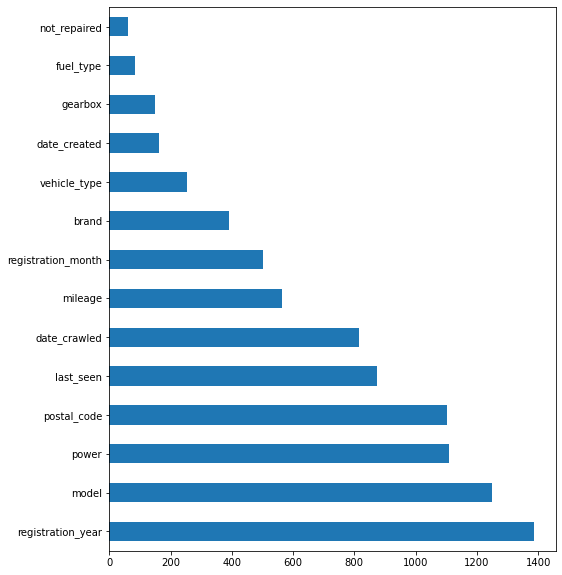

In [91]:
#Plot feature importance assigned by the model
feat_imp = pd.Series(best_lgbm.feature_importances_, index=features.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))
plt.show()

Next, we'll evaluate the performance of the LGBM model using label encoding (we are using an ensemble of tree-based models).

In [92]:

#Take time to fit and predict for the best LGBM model with Label encoded categorical data
time_in= time.time()
#define model
best_lgbm_le=  lgb.LGBMRegressor(colsample_bytree=0.9, learning_rate=0.5, max_depth=50,
              n_estimators=400, num_leaves=30, random_state=12345,
              subsample=0.9)
#train model
best_lgbm_le.fit(X_train_le, y_train_le)

#make predictions
predictions_lgbm_le= best_lgbm_le.predict(X_test_le)

#store time spent
time_out= time.time()
lgbm_le_pred_sec= round(time_out-time_in,2)
lgbm_le_pred_sec



2.17

In [93]:
#Calculate rmse for LightLGBM
best_lgbm_le_rmse= eval_regressor(predictions_lgbm_le, y_test_le)

best_lgbm_le_rmse

1663.73

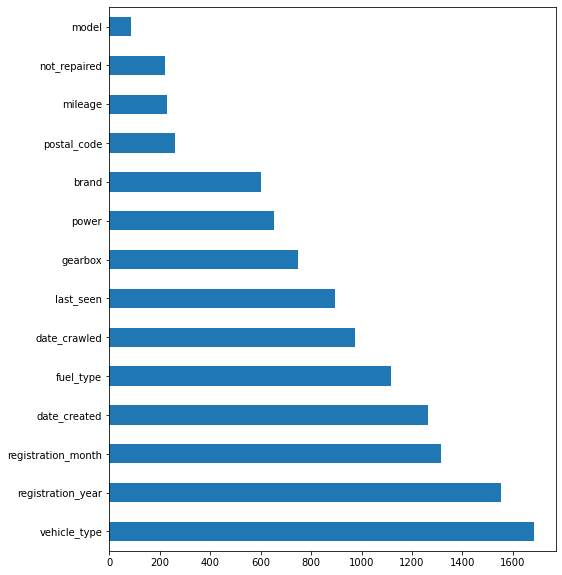

In [94]:
#Plot feature importance using label encoding
feat_imp = pd.Series(best_lgbm_le.feature_importances_, index=features.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))
plt.show()

#### 3.3.2) CatBoost Regressor

The catboost mudel contains a warning not to use one-hot encoding during preprocessing. This affects both the training speed and the resulting quality.

We will pass a list with categorical features to the pool class in order for catboost to handle them internally.

Then, we will try it also with label encoding.

In [95]:
%%time

#define categorical features
features_cat = [col for col in X_train.columns if X_train[col].dtype.name == 'category']

#define model
model_cat = CatBoostRegressor(loss_function='RMSE',early_stopping_rounds=20, iterations=50)

#try out differnt hyperparameters
grid = {'learning_rate': [0.05, 0.5],
        'depth': [5, 10],
        'l2_leaf_reg': [3,7,9]}

#use the dataset with categorical columns as "categories"
train_dataset = Pool(X_train, y_train,cat_features= features_cat) 
test_dataset = Pool(X_test, y_test,cat_features= features_cat)


grid_search_result = model_cat.grid_search(grid,
                                       train_dataset)



0:	learn: 6194.8799686	test: 6187.8177171	best: 6187.8177171 (0)	total: 180ms	remaining: 8.81s
1:	learn: 5957.5633991	test: 5949.5787838	best: 5949.5787838 (1)	total: 212ms	remaining: 5.08s
2:	learn: 5731.2007410	test: 5723.8265771	best: 5723.8265771 (2)	total: 242ms	remaining: 3.79s
3:	learn: 5519.8676597	test: 5512.3725699	best: 5512.3725699 (3)	total: 282ms	remaining: 3.25s
4:	learn: 5320.2844918	test: 5312.4105896	best: 5312.4105896 (4)	total: 312ms	remaining: 2.81s
5:	learn: 5132.2318555	test: 5124.2595673	best: 5124.2595673 (5)	total: 343ms	remaining: 2.52s
6:	learn: 4952.1324943	test: 4944.8540128	best: 4944.8540128 (6)	total: 378ms	remaining: 2.32s
7:	learn: 4787.6268603	test: 4779.9431293	best: 4779.9431293 (7)	total: 413ms	remaining: 2.17s
8:	learn: 4628.3991871	test: 4621.4124062	best: 4621.4124062 (8)	total: 444ms	remaining: 2.02s
9:	learn: 4483.4121759	test: 4476.6216449	best: 4476.6216449 (9)	total: 479ms	remaining: 1.92s
10:	learn: 4342.9763070	test: 4336.2496783	best: 4

In [96]:
#print best parameters
best_cat_parameters=grid_search_result['params']
best_cat_parameters

{'depth': 10, 'l2_leaf_reg': 3, 'learning_rate': 0.5}

In [97]:

#Take time to fit and predict for a CatBooster with the best parameters found
time_in= time.time()

#define model
best_model_cat = CatBoostRegressor(**best_cat_parameters,verbose=False)

#train model
best_model_cat.fit(X_train, y_train, cat_features= features_cat )

#make predictions
model_cat_predictions= best_model_cat.predict(X_test)

#store time spent
time_out= time.time()
cat_pred_sec= round(time_out-time_in,2)
cat_pred_sec


860.2

In [98]:
#store model RMSE
model_cat_rmse= eval_regressor(model_cat_predictions, y_test)
model_cat_rmse

1646.17

In [99]:

#Take time to fit and predict for a CatBooster with the best parameters found
time_in= time.time()

#define model
best_model_cat_le = CatBoostRegressor(**best_cat_parameters,verbose=False)

#train model
best_model_cat_le.fit(X_train_le, y_train_le)

#make predictions
model_cat_predictions_le= best_model_cat_le.predict(X_test_le)

#store time spent
time_out= time.time()
cat_pred_sec_le= round(time_out-time_in,2)
cat_pred_sec_le


44.08

In [100]:
#store model RMSE
model_cat_rmse_le= eval_regressor(model_cat_predictions_le, y_test_le)
model_cat_rmse_le

1655.25

### 3.3.3 XGBoost 

In [101]:
%%time
#Iterate through different hyperparameters and choose the one that achieves the lowest RMSE

#best_model_xgb=None

#best_rmse=2000

#for depth in [1,3,6]:
 #   for estimators in [50,100,500]:
  #      for rate in [0.001, 0.01, 0.1]:
   #         model_xgb= XGBRegressor(max_depth=depth, n_estimators=estimators, learning_rate=rate, min_child_weight=1, subsample=1)
            
    #        model_xgb.fit(X_train_ohe, y_train_ohe)
            
     #       pred_xgb= model_xgb.predict(X_test_ohe)
            
      #      xgb_rmse= eval_regressor(y_test_ohe, pred_xgb)
            
       #     if xgb_rmse<best_rmse:
        #        best_model_xgb=model_xgb
         #       best_rmse=xgb_rmse
                
            
            
            
#print(f'Best xgb model :{best_model_xgb}')
            
            
#print(f'Best xgb rmse :{best_rmse}')




Wall time: 0 ns


### Result when running the previous cell:
(set to comment lines to prevent it from running, due to the long time it takes to finish) 

Best xgb model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Best xgb rmse :1669.76

Wall time: 40min 3s

In [102]:
#take time from model creation to predictions making
time_in= time.time()

#define model
best_model_xgb= XGBRegressor(base_score=0.5, booster='gbtree', 
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1)

#train model
best_model_xgb.fit(X_train_ohe, y_train_ohe)

#make predictions
best_pred_xgb= best_model_xgb.predict(X_test_ohe)

#store time spent
time_out= time.time()
best_rmse_xgb= eval_regressor(y_test_ohe, best_pred_xgb)

xgb_pred_sec= round(time_out-time_in,2)

print(f'Best RMSE XGBooster:{best_rmse_xgb}')
print(f'Best time XGBooster:{xgb_pred_sec}')

Best RMSE XGBooster:1669.76
Best time XGBooster:298.74


## Model analysis

### Summary of RMSEs and Time taken by each model

In [103]:
#Create a dataframe with results
table_comp = pd.DataFrame({'Self-made linear regressor': [my_linear_pred_sec, my_linear_reg_rmse],
                          'Ready-implementantion Linear regression':[pre_made_linear_pred_sec, pre_made_linear_rmse],
                          'Decision tree regressor':[tree_regressor_pred_sec, rmse_tree],
                          'Random forest regressor':[random_forest_pred_sec,rmse_forest],
                          'LightGBM (auto-encoding categorical features)':[lgbm_auto_pred_sec,best_lgbm_auto_rmse ],
                          'LightGBM (label-encoding categorical features)':[lgbm_le_pred_sec,best_lgbm_le_rmse],
                          'CatBoost': [cat_pred_sec, model_cat_rmse],
                          'XGBoost': [xgb_pred_sec,best_rmse_xgb],
                          'CatBoost (label-encoding)':[cat_pred_sec_le,model_cat_rmse_le]}).T
table_comp=table_comp.rename(columns={0:'Time to train & predict (seconds)',1:'RMSE on test set'})
#sort by rmse in ascending order
table_comp= table_comp.sort_values(by=['RMSE on test set'],ascending=True)
#print
table_comp

,Time to train & predict (seconds),RMSE on test set
CatBoost,860.20,1646.17
LightGBM (auto-encoding categorical features),2.00,1654.32
CatBoost (label-encoding),44.08,1655.25
LightGBM (label-encoding categorical features),2.17,1663.73
XGBoost,298.74,1669.76
Random forest regressor,26.18,2117.82
Decision tree regressor,0.79,2195.97
Ready-implementantion Linear regression,3.34,2842.70
Self-made linear regressor,5.91,3105.87


## Conclusion

After importing and preparing the dataset with historical data on cars sold, encoding categorical features using One-hot encoding for linear regressors and Label encoding for tree-based models, and splitting the full dataset into train(75%) and test(25%) sets we tested the accuracy and time efficiency of different regression models, obtainig the following results:


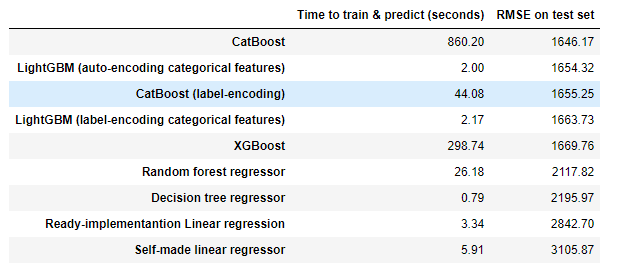


Undoubtedly, the best models in terms of accuracy were the ones using Gradient boosting. When it comes to time consumption, the fastest was LightGMB, achieving a significantly shorter train and prediction-making time than XGBoost and Catboost.


For the sake of comparisson, we may recall from above that the test target average was 4.619 €, and the median was 2,950 €. This means that the RMSE was more than half of the median in the best case.



Catboost auto-encoder caused a larger training and predicting time (more than 3x Label encoding). LightGBM performed similarly with both approaches.

On its side, XGBoost took excesively long to tune hypermarameters (40 min), and its predictions accuracy were really poor.


Finally, Linear regression models were the ones getting the less accurate predictions, in spite of making them quickly.


To wrap up, we'll create an ensemble of our self-built Linear regressor to see if we can improve RMSE by adding further models aimed to correct the errors made by the first regressor:





In [104]:
class my_linear_gb():
    
   #set nº of linear regressors to ensemble (four by default)
    def __init__(self, n_regressors= 4):
        self.n_reg= n_regressors
     
    #define fit method to train the models
    def fit(self, train_features, train_target):
        

        
        #list to append model at each step after fitting
        models_ensemble=[]
        
               
        #error at each step (in the first iteration the error equals the target -predictions are 0-)
        residuals = train_target  
        
        #placeholder for sum of predictions made by each ensembled model
        pred_array = np.zeros(train_target.shape[0])
        
        for i in range(self.n_reg):
         
                                   
            #define model
            my_linear_regression= MyLinearRegressor(0.02, 10 ,100, 0.001)

            #fit the model to predict residuals. In the very first iteration the residuals are original targets.
            my_linear_regression.fit(train_features, residuals)
            
            #make predictions on train set to calculate new residuals
            pred_linear= my_linear_regression.predict(train_features)
            
            #next y valid will be 
            y_valid= pred_array
    
            #add predicted values to predictions made up until the previous step
            pred_array+=pred_linear

            #append model to list

            models_ensemble.append(my_linear_regression)
            
            
            #calculate difference between train target and the accumulated predictions 
            residuals= (train_target- pred_array)
            
            
    

            
        #append the model to list
        self.models_ensemble= models_ensemble
    
    
    #define predict method to make predictions    
    def predict(self, test_features):
        #placeholder for accumulated amount of predictions made by each model
        pred_ensemble=0          
        
        #iterate through model
        for model in self.models_ensemble:
            #get predictions made by each model taking test features as input
            pred_test= model.predict(test_features)
            
            #add up predictions made by each model
            pred_ensemble+= pred_test
            
            
        
        return pred_ensemble


In [105]:
%%time 

#try with different count of regressors and store the one achieving the lowest RMSE

best_reg_ensemble=None
best_rmse_reg_ensemble=3105.87
best_reg=1

#iterate through several count of regressors
for regressor in [1,5,20]:
   
    # define model
    my_gb= my_linear_gb(n_regressors= regressor)
    
    #train model
    my_gb.fit(X_train_scaled_ohe, y_train_ohe)
   
    #make predictions
    my_gb_pred= my_gb.predict(X_test_scaled_ohe)
    
    #get rmse of predictions
    my_gb_rmse= eval_regressor(y_test_ohe, my_gb_pred)
    
    #store the model with the lowest rmse
    if my_gb_rmse<best_rmse_reg_ensemble:
        best_rmse_reg_ensemble= my_gb_rmse
        best_reg= regressor
        
print(f'Best regressors amount: {best_reg}')
print(f'Best RMSE: {best_rmse_reg_ensemble}')
    

Best regressors amount: 20
Best RMSE: 3053.52
Wall time: 2min 43s


We notice that even though the RMSE diminished a bit, also did the running time. Improvement througuh model ensembling is achieved slowly and stepwisely.


